In [1]:
from numpy.random import seed
seed(7)

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

# **Loading the dataset**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#(60,000, 784) for train
#(10,000, 784) for test
train = pd.read_csv("/content/gdrive/MyDrive/DL_DATA/fashion-mnist_train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/DL_DATA/fashion-mnist_test.csv")
print(train)
print(test)

       label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0          2       0       0       0  ...         0         0         0         0
1          9       0       0       0  ...         0         0         0         0
2          6       0       0       0  ...         0         0         0         0
3          0       0       0       0  ...         0         0         0         0
4          3       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
59995      9       0       0       0  ...         0         0         0         0
59996      1       0       0       0  ...         0         0         0         0
59997      8       0       0       0  ...         0         0         0         0
59998      8       0       0       0  ...         0         0         0         0
59999      7       0       0       0  ...         0         0         0         0

[60000 rows x 7

In [4]:
X_train = train.drop("label",axis = 1)  #basically taking all the columns except the label column
X_test = test.drop("label",axis = 1)

# **Convert Categorical Data**

In [5]:
#One Hot Encoding to convert the categorical labels to arrays

le = LabelEncoder()
one = OneHotEncoder(sparse=False) #https://stackoverflow.com/questions/66580608/meaning-of-sparse-false-pre-processing-data-with-onehotencoder

y_train = le.fit_transform(train["label"]) #taking the labels from the csv file (It was dropped in X_train, but we need them here)
y_train = y_train.reshape(len(y_train), -1)
y_train = one.fit_transform(y_train)
print(y_train)

y_test = le.fit_transform(test["label"])
y_test = y_test.reshape(len(y_test), -1)
y_test = one.fit_transform(y_test)
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# **Training the NN model**

**Model 1_1:** </br>
1. 3 layers 
2. 128+64+10 nodes in total 
3. Activation- ReLU
4. Loss- Categorical Cross Entropy Loss
5. Only testing and training
6. Time taken for 15 epochs- 61s

In [6]:
keras.backend.clear_session()

#https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc Freakin useful theory
#input layer, the starting tensor has the same shape as the input data. Thus, input_shape(784,) is the same as (batch_size,784). This means that each sample has 784 values.
#https://datascience.stackexchange.com/questions/53609/how-to-determine-input-shape-in-keras (Refer for loading the data, explains why only the columns are taken)

# Step 1 - Build the architecture

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model_1_1 = keras.Sequential([
    keras.layers.Dense(units=128, activation=tf.nn.relu, input_shape=(784, )), #input layer
    keras.layers.Dense(units=64, activation=tf.nn.relu), #1 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_1_1.summary() 

# Step 2 - Compile the model
model_1_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Step 3 - Train the model, by fitting it to the training data
NN_3 = model_1_1.fit(X_train, y_train, epochs=15)

#Step 4 - Evaluate the model
test_loss, test_acc = model_1_1.evaluate(X_test, y_test)
print("Model - 3 layers - test loss:", test_loss)
print("Model - 3 layers - test accuracy:", test_acc * 100)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5216 - accuracy: 0.6737
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8341 - accuracy: 0.7406
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8194 - accuracy: 0.7516
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8075 - accuracy: 0.7650
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8473 - accuracy: 0.7649
Epoch 6/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8164 - accuracy: 0.7655
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8509 - accuracy: 0.7595
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9047 - accuracy: 0.7604
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9254 - accuracy: 0.7598
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.925

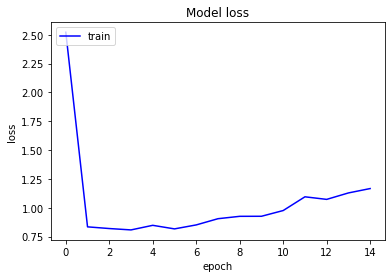

In [8]:
plt.plot(NN_3.history['loss'], 'blue')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

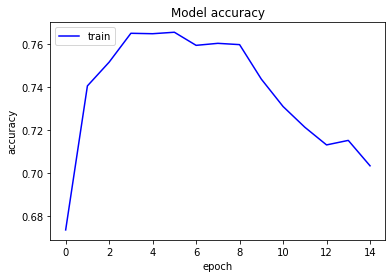

In [9]:
plt.plot(NN_3.history['accuracy'], 'blue')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

**Model 1_2:** </br>
1. 4 layers 
2. 256+128+32+10 nodes in total 
3. Activation- Sigmoid
4. Loss- KL Divergence
5. adam optimizer
6. Testing, training, Validation (aka Hold-Out Validation)
7. Tested in batches (Not necessary cause small model anyways)
8. Time taken for 20 epochs- 41s

In [10]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_1_2 = keras.Sequential([
    keras.layers.Dense(units=256, activation=tf.nn.sigmoid, input_shape=(784, )), #input layer
    keras.layers.Dense(units=128, activation=tf.nn.sigmoid), #1 hidden layer
    keras.layers.Dense(units=32, activation=tf.nn.sigmoid), #2 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_1_2.summary() 

model_1_2.compile(optimizer="adam", loss='kl_divergence', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________


In [11]:
NN_3b = model_1_2.fit(X_train, y_train, epochs=20, batch_size=196, validation_split=0.2)

test_loss, test_acc = model_1_2.evaluate(X_test, y_test)
print("Model - 4 layers - test loss:", test_loss)
print("Model - 4 layers - test accuracy:", test_acc * 100)

Epoch 1/20
245/245 [==============================] - 3s 12ms/step - loss: 1.3332 - accuracy: 0.6231 - val_loss: 0.8368 - val_accuracy: 0.7387
Epoch 2/20
245/245 [==============================] - 2s 10ms/step - loss: 0.7457 - accuracy: 0.7410 - val_loss: 0.6858 - val_accuracy: 0.7496
Epoch 3/20
245/245 [==============================] - 3s 10ms/step - loss: 0.6759 - accuracy: 0.7487 - val_loss: 0.6666 - val_accuracy: 0.7583
Epoch 4/20
245/245 [==============================] - 2s 10ms/step - loss: 0.6656 - accuracy: 0.7495 - val_loss: 0.6560 - val_accuracy: 0.7498
Epoch 5/20
245/245 [==============================] - 3s 11ms/step - loss: 0.6336 - accuracy: 0.7585 - val_loss: 0.6360 - val_accuracy: 0.7589
Epoch 6/20
245/245 [==============================] - 2s 10ms/step - loss: 0.6246 - accuracy: 0.7635 - val_loss: 0.6351 - val_accuracy: 0.7592
Epoch 7/20
245/245 [==============================] - 2s 10ms/step - loss: 0.6217 - accuracy: 0.7641 - val_loss: 0.6501 - val_accuracy: 0.7538

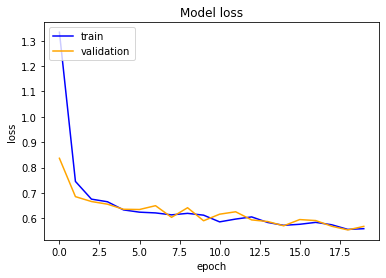

In [12]:
plt.plot(NN_3b.history['loss'], 'blue')
plt.plot(NN_3b.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

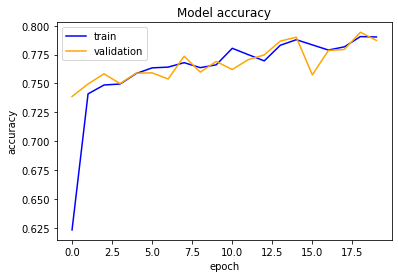

In [13]:
plt.plot(NN_3b.history['accuracy'], 'blue')
plt.plot(NN_3b.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 1_3:** </br>
1. 5 layers 
2. 256+128+32+16+10 nodes in total 
3. Activation- Tanh
4. Loss- Categorical Cross Entropy
5. Testing, training, , K-folds (5 folds) Cross Validation
6. Time taken for 12 epochs- About 90s per fold, and 5 folds

In [14]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

#For K-folds cross validation great sample https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/
#concatenating the dataframes
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
#To hold the final values of accuracy and loss
acc_per_fold = []
loss_per_fold = []

#K-Fold model- 5 fold cross validation
kfold = KFold(n_splits= 5, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model_1_3 = keras.Sequential([
    keras.layers.Dense(units=256, activation=tf.nn.tanh, input_shape=(784, )), #input layer
    keras.layers.Dense(units=128, activation=tf.nn.tanh), #1 hidden layer
    keras.layers.Dense(units=32, activation=tf.nn.tanh), #2 hidden layer
    keras.layers.Dense(units=16, activation=tf.nn.tanh), #3 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
  ])
  model_1_3.summary() 

  model_1_3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
  print(f'Training for fold {fold_no} ...')

  NN_3c = model_1_3.fit(inputs[train], targets[train], epochs=12)

  scores = model_1_3.evaluate(inputs[test], targets[test])
  print(f'Score for fold {fold_no}: {model_1_3.metrics_names[0]} of {scores[0]}; {model_1_3.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 238,682
Trainable params: 238,682
Non-trainable params: 0
_________________________________________________________________
Training for fold 1 ...
Epoch 1/12
1750/1750 [==============================] - 11s 6ms/step - loss: 0.8273 - accura

In [15]:
# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.5419861078262329 - Accuracy: 80.15714287757874%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.5826827883720398 - Accuracy: 77.76428461074829%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5752386450767517 - Accuracy: 79.19285893440247%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.5273550748825073 - Accuracy: 80.37857413291931%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.569739043712616 - Accuracy: 79.3571412563324%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 79.37000036239624 (+- 0.9215944777401526)
> Loss: 0.5594003319740295
------------------------------

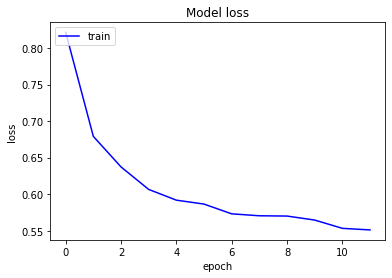

In [16]:
#For fold 5
plt.plot(NN_3c.history['loss'], 'blue')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

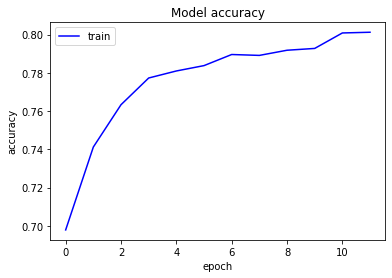

In [17]:
#For fold 5
plt.plot(NN_3c.history['accuracy'], 'blue')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

**Model 1_4:** </br>
1. 6 layers 
2. 256+32+128+32+16+10 nodes in total 
3. Activation- ReLU
4. Loss- KL Divergence
5. Testing, Training, validation 
6. Time taken for 15 epochs- about 120s

In [76]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_1_4 = keras.Sequential([
    keras.layers.Dense(units=256, activation=tf.nn.relu, input_shape=(784, )), #input layer
    keras.layers.Dense(units=32, activation=tf.nn.relu), #1 hidden layer
    keras.layers.Dense(units=128, activation=tf.nn.relu), #2 hidden layer  
    #I speculate that this network will perform bad cause the neurons are increasing in the next layer and loss of data thus happens. BUT THAT'S NOT THE CASE AFTER TESTING
    #The model gets more adaptive, so it can learn smaller details. But this means not necessary, that your classifier is then better on the 'next dataset'. 
    #The model gets more affected to over-fitting and so the generalization of you classification model can also decrease, e.g. your classifier will work worse on the next dataset.
    keras.layers.Dense(units=32, activation=tf.nn.relu), #3 hidden layer
    keras.layers.Dense(units=16, activation=tf.nn.relu), #4 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_1_4.summary() 

model_1_4.compile(loss='kl_divergence', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 218,234
Trainable params: 218,234
Non-trainable params: 0
__________________________________________________

In [77]:
NN_6 = model_1_4.fit(X_train, y_train, epochs=15, validation_split=0.2)

test_loss, test_acc = model_1_4.evaluate(X_test, y_test)
print("Model - 6 layers - test loss:", test_loss)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/15
1500/1500 [==============================] - 9s 5ms/step - loss: 3.7795 - accuracy: 0.5456 - val_loss: 0.7482 - val_accuracy: 0.7509
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6886 - accuracy: 0.7570 - val_loss: 0.6121 - val_accuracy: 0.7640
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6304 - accuracy: 0.7907 - val_loss: 0.6765 - val_accuracy: 0.7759
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6298 - accuracy: 0.7977 - val_loss: 0.5893 - val_accuracy: 0.7993
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6259 - accuracy: 0.8010 - val_loss: 0.7681 - val_accuracy: 0.7924
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6106 - accuracy: 0.8061 - val_loss: 0.6361 - val_accuracy: 0.7983
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6055 - accuracy: 0.8147 - val_loss: 0.7089 - val_accuracy:

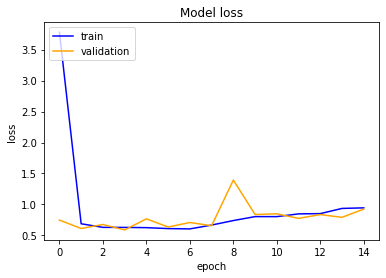

In [78]:
plt.plot(NN_6.history['loss'], 'blue')
plt.plot(NN_6.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

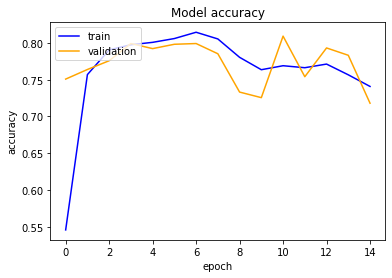

In [79]:
plt.plot(NN_6.history['accuracy'], 'blue')
plt.plot(NN_6.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 1_5:** (same as 1_4 but comparing if the model does better when number of neurons decsreasing as usual)</br>
1. 6 layers 
2. 256+128+64+32+16+10 nodes in total 
3. Activation- ReLU
4. Loss- KL Divergence
5. Testing, Training, Validation
6. Time taken for 15 epochs- 120s

In [22]:
keras.backend.clear_session()

model_1_5 = keras.Sequential([
    keras.layers.Dense(units=256, activation=tf.nn.relu, input_shape=(784, )), #input layer
    keras.layers.Dense(units=128, activation=tf.nn.relu, kernel_initializer="he_normal"), #1 hidden layer
    keras.layers.Dense(units=64, activation=tf.nn.relu, kernel_initializer="he_normal"), #2 hidden layer 
    keras.layers.Dense(units=32, activation=tf.nn.relu, kernel_initializer="he_normal"), #3 hidden layer
    keras.layers.Dense(units=16, activation=tf.nn.relu, kernel_initializer="he_normal"), #4 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax,) #output layer
])
model_1_5.summary() 

model_1_5.compile(loss='kl_divergence', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 244,890
Trainable params: 244,890
Non-trainable params: 0
__________________________________________________

In [23]:
NN_6b = model_1_5.fit(X_train, y_train, epochs=15, validation_split=0.2)

test_loss, test_acc = model_1_5.evaluate(X_test, y_test)
print("Model - 6 layers - test loss:", test_loss)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/15
1500/1500 [==============================] - 10s 6ms/step - loss: 14.4877 - accuracy: 0.1010 - val_loss: 14.4239 - val_accuracy: 0.1048
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 14.3809 - accuracy: 0.1077 - val_loss: 14.4902 - val_accuracy: 0.1010
Epoch 3/15
1500/1500 [==============================] - 11s 7ms/step - loss: 14.5104 - accuracy: 0.0997 - val_loss: 14.4902 - val_accuracy: 0.1010
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 14.5104 - accuracy: 0.0997 - val_loss: 14.4902 - val_accuracy: 0.1010
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 14.5104 - accuracy: 0.0997 - val_loss: 14.4902 - val_accuracy: 0.1010
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 14.5104 - accuracy: 0.0997 - val_loss: 14.4902 - val_accuracy: 0.1010
Epoch 7/15
1500/1500 [==============================] - 9s 6ms/step - loss: 14.5104 - accuracy: 0.0997 - val_loss: 14.4902

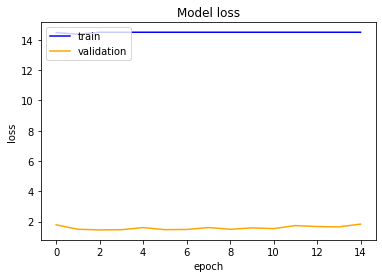

In [24]:
plt.plot(NN_6b.history['loss'], 'blue')
plt.plot(NN_6.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

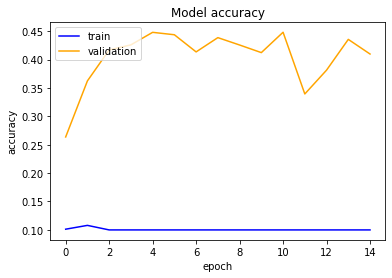

In [25]:
plt.plot(NN_6b.history['accuracy'], 'blue')
plt.plot(NN_6.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 1_6:** </br>
1. 4 layers 
2. 128+64+32+10 nodes in total 
3. Activation- Leaky_ReLU
4. Loss- KL Divergence
5. adam optimizer
6. Testing, training, Validation (aka Hold-Out Validation)
7. Tested in batches (Not necessary cause small model anyways)
8. Time taken for 20 epochs- 41s

In [26]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_1_6 = keras.Sequential([
    keras.layers.Dense(units=128, activation=tf.nn.leaky_relu, input_shape=(784, )), #input layer
    keras.layers.Dense(units=64, activation=tf.nn.leaky_relu), #1 hidden layer
    keras.layers.Dense(units=32, activation=tf.nn.leaky_relu), #2 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_1_6.summary() 

model_1_6.compile(optimizer="adam", loss='kl_divergence', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [27]:
NN_3g = model_1_6.fit(X_train, y_train, epochs=20, batch_size=196, validation_split=0.2)

test_loss, test_acc = model_1_6.evaluate(X_test, y_test)
print("Model - 4 layers - test loss:", test_loss)
print("Model - 4 layers - test accuracy:", test_acc * 100)

Epoch 1/20
245/245 [==============================] - 3s 9ms/step - loss: 12.9388 - accuracy: 0.1970 - val_loss: 12.8757 - val_accuracy: 0.2012
Epoch 2/20
245/245 [==============================] - 2s 7ms/step - loss: 12.9068 - accuracy: 0.1992 - val_loss: 12.8934 - val_accuracy: 0.1999
Epoch 3/20
245/245 [==============================] - 2s 7ms/step - loss: 12.9136 - accuracy: 0.1986 - val_loss: 12.9751 - val_accuracy: 0.1950
Epoch 4/20
245/245 [==============================] - 2s 8ms/step - loss: 12.8948 - accuracy: 0.2000 - val_loss: 12.9751 - val_accuracy: 0.1950
Epoch 5/20
245/245 [==============================] - 2s 8ms/step - loss: 12.8948 - accuracy: 0.2000 - val_loss: 12.9751 - val_accuracy: 0.1950
Epoch 6/20
245/245 [==============================] - 2s 7ms/step - loss: 12.8948 - accuracy: 0.2000 - val_loss: 12.9751 - val_accuracy: 0.1950
Epoch 7/20
245/245 [==============================] - 2s 7ms/step - loss: 12.8948 - accuracy: 0.2000 - val_loss: 12.9751 - val_accuracy:

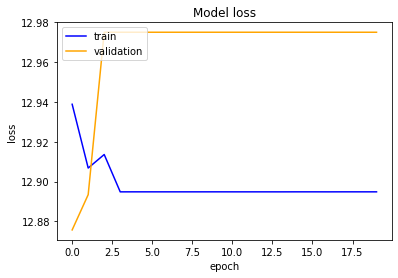

In [28]:
plt.plot(NN_3g.history['loss'], 'blue')
plt.plot(NN_3g.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

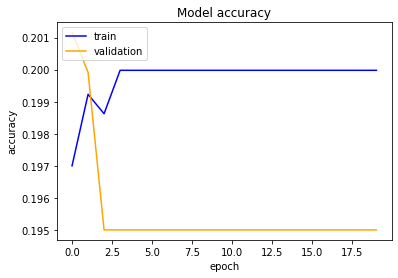

In [29]:
plt.plot(NN_3g.history['accuracy'], 'blue')
plt.plot(NN_3g.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 1_7:** </br>
1. 5 layers 
2. 256+128+32+16+10 nodes in total 
3. Activation- Leaky_ReLU
4. Loss- Categorical Cross Entropy
5. Testing, training, validation
6. Time taken for 12 epochs- about 115s

In [30]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_1_7 = keras.Sequential([
    keras.layers.Dense(units=256, activation=tf.nn.leaky_relu, input_shape=(784, )), #input layer
    keras.layers.Dense(units=128, activation=tf.nn.leaky_relu), #1 hidden layer
    keras.layers.Dense(units=32, activation=tf.nn.leaky_relu), #2 hidden layer
    keras.layers.Dense(units=16, activation=tf.nn.leaky_relu), #3 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_1_7.summary() 

model_1_7.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 238,682
Trainable params: 238,682
Non-trainable params: 0
_________________________________________________________________


In [31]:
NN_3h = model_1_7.fit(X_train, y_train, epochs=12)

test_loss, test_acc = model_1_7.evaluate(X_test, y_test)
print("Model - 5 layers - test loss:", test_loss)
print("Model - 5 layers - test accuracy:", test_acc * 100)

Epoch 1/12
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6241 - accuracy: 0.7358
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5569 - accuracy: 0.8202
Epoch 3/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4852 - accuracy: 0.8384
Epoch 4/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4474 - accuracy: 0.8487
Epoch 5/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4297 - accuracy: 0.8562
Epoch 6/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4177 - accuracy: 0.8591
Epoch 7/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4005 - accuracy: 0.8654
Epoch 8/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3986 - accuracy: 0.8680
Epoch 9/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3862 - accuracy: 0.8691
Epoch 10/12
1875/1875 [==============================] - 11s 6ms/step - l

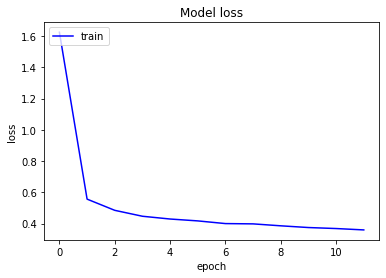

In [32]:
plt.plot(NN_3h.history['loss'], 'blue')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

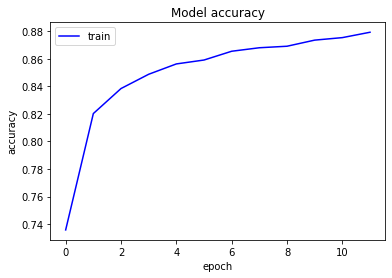

In [33]:
plt.plot(NN_3h.history['accuracy'], 'blue')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

**Model 2_1:** </br>
1. 10 layers (8 hidden layers)
2. 1024+512+256+200+128+100+64+50+20+10 nodes in total
3. Activation- ReLU
4. Loss- Categorical Cross Entropy Loss
5. Dropout used 
6. Training, testing, and validation
7. Time taken for 10 epochs- about 5 minutes

In [34]:
keras.backend.clear_session()


model_2_1 = keras.Sequential([
    keras.layers.Dense(units=1024, activation=tf.nn.relu, input_shape=(784, )), #input layer basically converting it to a higher dimension 
    keras.layers.Dense(units=512, activation=tf.nn.relu), #1 hidden layer
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=256, activation=tf.nn.relu), #2 hidden layer
    keras.layers.Dense(units=200, activation=tf.nn.relu), #3 hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation=tf.nn.relu), #4 hidden layer
    keras.layers.Dense(units=100, activation=tf.nn.relu), #5 hidden layer
    keras.layers.Dense(units=64, activation=tf.nn.relu), #6 hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=50, activation=tf.nn.relu), #7 hidden layer
    keras.layers.Dense(units=20, activation=tf.nn.relu), #8 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_2_1.summary() 

model_2_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               51400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2

In [35]:
NN_10 = model_2_1.fit(X_train, y_train, epochs=10, validation_split=0.2)

test_loss, test_acc = model_2_1.evaluate(X_test, y_test)
print("Model - 10 layers - test loss:", test_loss)
print("Model - 10 layers - test accuracy:", test_acc * 100)

Epoch 1/10
1500/1500 [==============================] - 42s 27ms/step - loss: 2.4895 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 2.3040 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1011
Epoch 3/10
1500/1500 [==============================] - 43s 28ms/step - loss: 2.3032 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1011
Epoch 4/10
1500/1500 [==============================] - 43s 28ms/step - loss: 2.3036 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1013
Epoch 5/10
1500/1500 [==============================] - 43s 29ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 6/10
1500/1500 [==============================] - 43s 28ms/step - loss: 2.3032 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1013
Epoch 7/10
1500/1500 [==============================] - 43s 29ms/step - loss: 2.3032 - accuracy: 0.0972 - val_loss: 2.3026 -

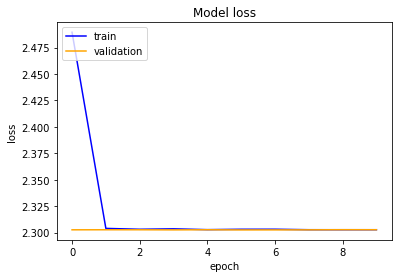

In [36]:
plt.plot(NN_10.history['loss'], 'blue')
plt.plot(NN_10.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

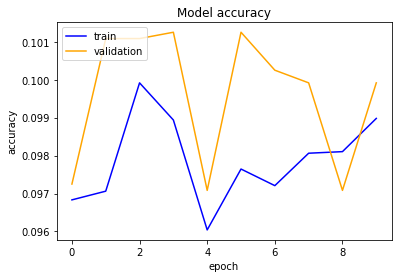

In [37]:
plt.plot(NN_10.history['accuracy'], 'blue')
plt.plot(NN_10.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 2_2:** (same as model 2_1 but removing the 1024 nodes in the first layer to check if accuracy improves)</br>
1. 9 layers
2. 512+256+200+128+100+64+50+20+10 nodes in total
3. Activation- ReLU
4. Loss- Categorical Cross Entropy Loss
5. Dropout used 
6. Training, testing, and validation
7. Time taken for 10 epochs- about 2 minutes

In [38]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)
model_2_2 = keras.Sequential([ 
    keras.layers.Dense(units=512, activation=tf.nn.relu, input_shape=(784, )), #input layer basically converting it to a higher dimension
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=256, activation=tf.nn.relu), 
    keras.layers.Dense(units=200, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation=tf.nn.relu), 
    keras.layers.Dense(units=100, activation=tf.nn.relu), 
    keras.layers.Dense(units=64, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=50, activation=tf.nn.relu), 
    keras.layers.Dense(units=20, activation=tf.nn.relu), 
    keras.layers.Dense(units=10, activation=tf.nn.softmax) 
])
model_2_2.summary() 

model_2_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               51400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1

In [39]:
NN_9 = model_2_2.fit(X_train, y_train, epochs=10, validation_split=0.2)

test_loss, test_acc = model_2_2.evaluate(X_test, y_test)
print("Model - 9 layers - test loss:", test_loss)
print("Model - 9 layers - test accuracy:", test_acc * 100)

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 1.1869 - accuracy: 0.6115 - val_loss: 0.6569 - val_accuracy: 0.7520
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.7506 - accuracy: 0.7513 - val_loss: 0.6706 - val_accuracy: 0.7529
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.7918 - accuracy: 0.7576 - val_loss: 0.5990 - val_accuracy: 0.7928
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.7939 - accuracy: 0.7588 - val_loss: 0.6590 - val_accuracy: 0.7972
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.9859 - accuracy: 0.7448 - val_loss: 0.6774 - val_accuracy: 0.7904
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.9941 - accuracy: 0.7151 - val_loss: 0.6541 - val_accuracy: 0.7801
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 1.0310 - accuracy: 0.7213 - val_loss: 1.0257 -

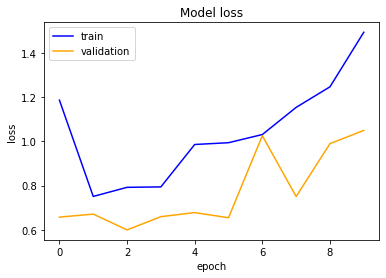

In [40]:
plt.plot(NN_9.history['loss'], 'blue')
plt.plot(NN_9.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

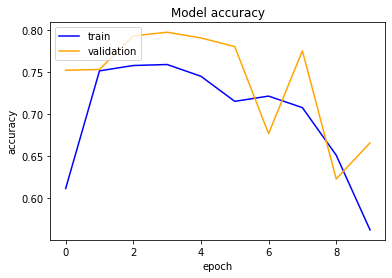

In [41]:
plt.plot(NN_9.history['accuracy'], 'blue')
plt.plot(NN_9.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 2_3:** (same as model 2_2 but adding batch normalization to check if accuracy improves)</br>
1. 9 layers
2. 512+256+200+128+100+64+50+20+10 nodes in total
3. Activation- ReLU
4. Loss- Categorical Cross Entropy Loss
5. Dropout used 
6. Batch Normalization (Reducing the number of training epochs required to train deep networks.)
7. Training, testing, and validation (testing in batches)
8. Time taken for 10 epochs- about 81s

In [42]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)
model_2_3 = keras.Sequential([ 
    keras.layers.Dense(units=512, activation=tf.nn.relu, input_shape=(784, )), #input layer basically converting it to a higher dimension
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=256, activation=tf.nn.relu), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=200, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=128, activation=tf.nn.relu), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=100, activation=tf.nn.relu), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=64, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=50, activation=tf.nn.relu), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=20, activation=tf.nn.relu), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=10, activation=tf.nn.softmax) 
])
model_2_3.summary() 

model_2_3.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               51400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0

In [43]:
NN_9b = model_2_3.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

test_loss, test_acc = model_2_3.evaluate(X_test, y_test)
print("Model - 9 layers - test loss:", test_loss)
print("Model - 9 layers - test accuracy:", test_acc * 100)

Epoch 1/10
375/375 [==============================] - 12s 25ms/step - loss: 0.7546 - accuracy: 0.7501 - val_loss: 0.5552 - val_accuracy: 0.8093
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.5029 - accuracy: 0.8249 - val_loss: 0.4701 - val_accuracy: 0.8346
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.4638 - accuracy: 0.8368 - val_loss: 0.4136 - val_accuracy: 0.8528
Epoch 4/10
375/375 [==============================] - 10s 26ms/step - loss: 0.4369 - accuracy: 0.8452 - val_loss: 0.4460 - val_accuracy: 0.8405
Epoch 5/10
375/375 [==============================] - 9s 25ms/step - loss: 0.4181 - accuracy: 0.8530 - val_loss: 0.4284 - val_accuracy: 0.8530
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.4041 - accuracy: 0.8572 - val_loss: 0.3987 - val_accuracy: 0.8638
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.3983 - accuracy: 0.8581 - val_loss: 0.4571 - val_accuracy: 0.84

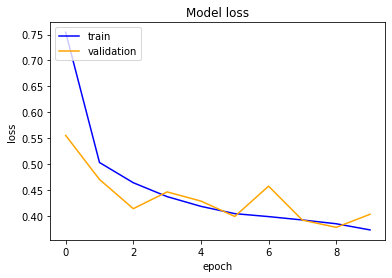

In [44]:
plt.plot(NN_9b.history['loss'], 'blue')
plt.plot(NN_9b.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

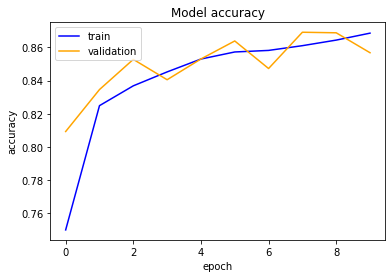

In [45]:
plt.plot(NN_9b.history['accuracy'], 'blue')
plt.plot(NN_9b.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 4_1:** </br>
1. 5 layers 
2. 128+64+32+16+10 nodes in total 
3. Activation- LeakyReLU
4. Categorical Crossentropy
5. adam optimizer
6. Testing, training, Validation (aka Hold-Out Validation)
7. Tested in batches (Not necessary cause small model anyways)
8. Time taken for 20 epochs- 41s

In [46]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_1 = keras.models.Sequential([
    
    keras.layers.Dense(128, kernel_initializer="he_normal",input_shape=(784,)),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(64, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(32, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(16, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model_4_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model_4_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [47]:
NN_4_1 = model_4_1.fit(X_train, y_train, epochs=20, batch_size=196, validation_split=0.2)

test_loss, test_acc = model_4_1.evaluate(X_test, y_test)
print("Model - 5 layers - test loss:", test_loss)
print("Model - 5 layers - test accuracy:", test_acc * 100)

Epoch 1/20
245/245 [==============================] - 4s 10ms/step - loss: 0.6296 - accuracy: 0.8073 - val_loss: 0.5638 - val_accuracy: 0.8192
Epoch 2/20
245/245 [==============================] - 2s 10ms/step - loss: 0.3972 - accuracy: 0.8634 - val_loss: 0.4398 - val_accuracy: 0.8432
Epoch 3/20
245/245 [==============================] - 2s 9ms/step - loss: 0.3452 - accuracy: 0.8778 - val_loss: 0.3666 - val_accuracy: 0.8674
Epoch 4/20
245/245 [==============================] - 3s 10ms/step - loss: 0.3176 - accuracy: 0.8868 - val_loss: 0.3706 - val_accuracy: 0.8664
Epoch 5/20
245/245 [==============================] - 3s 10ms/step - loss: 0.2967 - accuracy: 0.8928 - val_loss: 0.3720 - val_accuracy: 0.8713
Epoch 6/20
245/245 [==============================] - 2s 9ms/step - loss: 0.2816 - accuracy: 0.8979 - val_loss: 0.3649 - val_accuracy: 0.8763
Epoch 7/20
245/245 [==============================] - 2s 9ms/step - loss: 0.2673 - accuracy: 0.9019 - val_loss: 0.4089 - val_accuracy: 0.8500
Ep

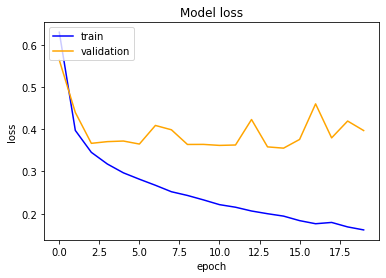

In [48]:
plt.plot(NN_4_1.history['loss'], 'blue')
plt.plot(NN_4_1.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

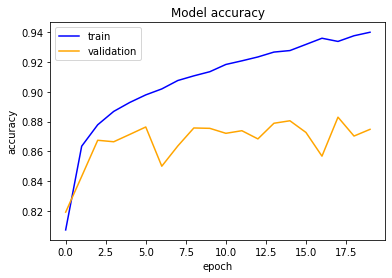

In [49]:
plt.plot(NN_4_1.history['accuracy'], 'blue')
plt.plot(NN_4_1.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 4_2:** </br>
1. 5 layers 
2. 128+64+32+16+10 nodes in total 
3. Activation- ReLU
4. Categorical Crossentropy
5. adam optimizer
6. Testing, training, Validation (aka Hold-Out Validation)
7. Tested in batches (Not necessary cause small model anyways)
8. Time taken for 20 epochs- 41s

In [50]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_2 = keras.models.Sequential([
    
    keras.layers.Dense(128, kernel_initializer="he_normal",input_shape=(784,)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(64, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(16, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model_4_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model_4_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
re_lu (ReLU)                 (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [51]:
NN_4_2 = model_4_2.fit(X_train, y_train, epochs=20, batch_size=196, validation_split=0.2)

test_loss, test_acc = model_4_2.evaluate(X_test, y_test)
print("Model - 5 layers - test loss:", test_loss)
print("Model - 5 layers - test accuracy:", test_acc * 100)

Epoch 1/20
245/245 [==============================] - 3s 9ms/step - loss: 0.7245 - accuracy: 0.7929 - val_loss: 0.5566 - val_accuracy: 0.8307
Epoch 2/20
245/245 [==============================] - 2s 8ms/step - loss: 0.3871 - accuracy: 0.8701 - val_loss: 0.4925 - val_accuracy: 0.8306
Epoch 3/20
245/245 [==============================] - 2s 8ms/step - loss: 0.3334 - accuracy: 0.8822 - val_loss: 0.3811 - val_accuracy: 0.8630
Epoch 4/20
245/245 [==============================] - 2s 8ms/step - loss: 0.2976 - accuracy: 0.8939 - val_loss: 0.3998 - val_accuracy: 0.8615
Epoch 5/20
245/245 [==============================] - 2s 8ms/step - loss: 0.2768 - accuracy: 0.9002 - val_loss: 0.3603 - val_accuracy: 0.8738
Epoch 6/20
245/245 [==============================] - 2s 8ms/step - loss: 0.2582 - accuracy: 0.9062 - val_loss: 0.3626 - val_accuracy: 0.8713
Epoch 7/20
245/245 [==============================] - 2s 9ms/step - loss: 0.2403 - accuracy: 0.9123 - val_loss: 0.4233 - val_accuracy: 0.8467
Epoch 

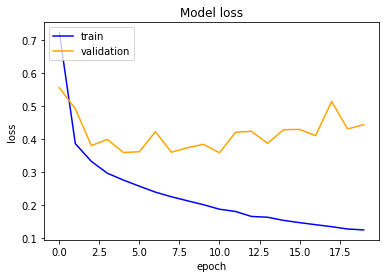

In [52]:
plt.plot(NN_4_2.history['loss'], 'blue')
plt.plot(NN_4_2.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

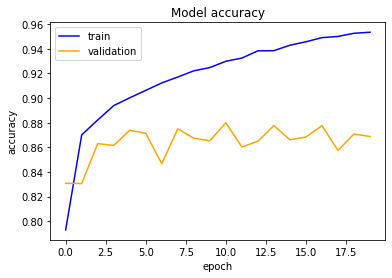

In [53]:
plt.plot(NN_4_2.history['accuracy'], 'blue')
plt.plot(NN_4_2.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 4_3:** </br>
1. 5 layers 
2. 128+64+32+16+10 nodes in total 
3. Activation- Tanh
4. Categorical Crossentropy
5. adam optimizer
6. Testing, training, Validation (aka Hold-Out Validation)
7. Tested in batches (Not necessary cause small model anyways)
8. Time taken for 20 epochs- 41s

In [54]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_3 = keras.models.Sequential([
    
    keras.layers.Dense(128, activation=tf.nn.tanh, kernel_initializer="he_normal",input_shape=(784,)),
    keras.layers.BatchNormalization(),
 
    keras.layers.Dense(64, activation=tf.nn.tanh, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
 
    keras.layers.Dense(32, activation=tf.nn.tanh, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(16, activation=tf.nn.tanh, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model_4_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model_4_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [55]:
NN_4_3 = model_4_3.fit(X_train, y_train, epochs=20, batch_size=196, validation_split=0.2)

test_loss, test_acc = model_4_3.evaluate(X_test, y_test)
print("Model - 5 layers - test loss:", test_loss)
print("Model - 5 layers - test accuracy:", test_acc * 100)

Epoch 1/20
245/245 [==============================] - 4s 10ms/step - loss: 1.0497 - accuracy: 0.6333 - val_loss: 1.4401 - val_accuracy: 0.5384
Epoch 2/20
245/245 [==============================] - 2s 10ms/step - loss: 0.8505 - accuracy: 0.6751 - val_loss: 1.3782 - val_accuracy: 0.4714
Epoch 3/20
245/245 [==============================] - 3s 12ms/step - loss: 0.8754 - accuracy: 0.6662 - val_loss: 1.5592 - val_accuracy: 0.4379
Epoch 4/20
245/245 [==============================] - 3s 11ms/step - loss: 0.8807 - accuracy: 0.6679 - val_loss: 0.9385 - val_accuracy: 0.6641
Epoch 5/20
245/245 [==============================] - 2s 8ms/step - loss: 0.8038 - accuracy: 0.6914 - val_loss: 1.0696 - val_accuracy: 0.6402
Epoch 6/20
245/245 [==============================] - 2s 8ms/step - loss: 0.7810 - accuracy: 0.7104 - val_loss: 1.7257 - val_accuracy: 0.4943
Epoch 7/20
245/245 [==============================] - 2s 9ms/step - loss: 0.7919 - accuracy: 0.7041 - val_loss: 0.8107 - val_accuracy: 0.7104
Ep

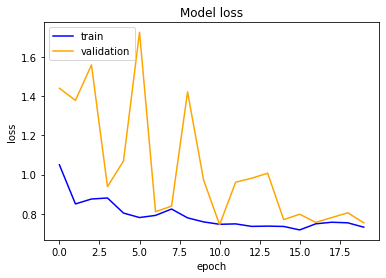

In [56]:
plt.plot(NN_4_3.history['loss'], 'blue')
plt.plot(NN_4_3.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

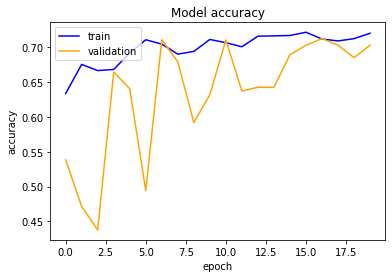

In [57]:
plt.plot(NN_4_3.history['accuracy'], 'blue')
plt.plot(NN_4_3.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 4_4:** </br>
1. 5 layers 
2. 128+64+32+16+10 nodes in total 
3. Activation- sigmoid
4. Categorical Crossentropy
5. adam optimizer
6. Testing, training, Validation (aka Hold-Out Validation)
7. Tested in batches (Not necessary cause small model anyways)
8. Time taken for 20 epochs- 41s

In [58]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_4 = keras.models.Sequential([
    
    keras.layers.Dense(128,activation=tf.nn.sigmoid, kernel_initializer="he_normal",input_shape=(784,)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(64,activation=tf.nn.sigmoid, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(32,activation=tf.nn.sigmoid, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(16,activation=tf.nn.sigmoid, kernel_initializer="he_normal"),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model_4_4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model_4_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [59]:
NN_4_4 = model_4_4.fit(X_train, y_train, epochs=20, batch_size=196, validation_split=0.2)

test_loss, test_acc = model_4_4.evaluate(X_test, y_test)
print("Model - 5 layers - test loss:", test_loss)
print("Model - 5 layers - test accuracy:", test_acc * 100)

Epoch 1/20
245/245 [==============================] - 4s 10ms/step - loss: 0.8930 - accuracy: 0.6940 - val_loss: 1.2281 - val_accuracy: 0.6482
Epoch 2/20
245/245 [==============================] - 2s 8ms/step - loss: 0.7247 - accuracy: 0.7241 - val_loss: 0.8599 - val_accuracy: 0.6939
Epoch 3/20
245/245 [==============================] - 2s 9ms/step - loss: 0.7138 - accuracy: 0.7232 - val_loss: 0.8454 - val_accuracy: 0.6865
Epoch 4/20
245/245 [==============================] - 2s 8ms/step - loss: 0.6966 - accuracy: 0.7350 - val_loss: 0.7744 - val_accuracy: 0.6926
Epoch 5/20
245/245 [==============================] - 2s 8ms/step - loss: 0.6882 - accuracy: 0.7301 - val_loss: 0.8097 - val_accuracy: 0.6531
Epoch 6/20
245/245 [==============================] - 2s 8ms/step - loss: 0.6580 - accuracy: 0.7461 - val_loss: 0.6781 - val_accuracy: 0.7419
Epoch 7/20
245/245 [==============================] - 2s 9ms/step - loss: 0.6631 - accuracy: 0.7468 - val_loss: 0.6902 - val_accuracy: 0.7290
Epoch

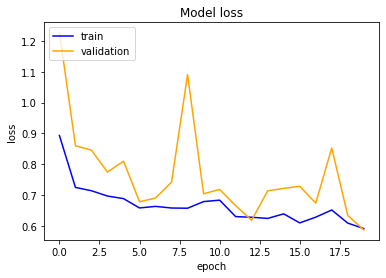

In [60]:
plt.plot(NN_4_4.history['loss'], 'blue')
plt.plot(NN_4_4.history['val_loss'], 'orange')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

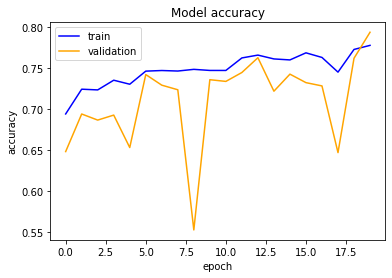

In [61]:
plt.plot(NN_4_4.history['accuracy'], 'blue')
plt.plot(NN_4_4.history['val_accuracy'], 'orange')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

**Model 4_5:**
1. 4 layers
2. 128+64+32+10 nodes in total
3. Activation- ReLu
4. Loss- KL Divergence
5. adam optimizer
6. Testing, training
7. Time taken for 20 epochs- 92s


In [62]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_5 = keras.Sequential([
    keras.layers.Dense(units=128, activation=tf.nn.relu, input_shape=(784, )), #input layer
    keras.layers.Dense(units=64, activation=tf.nn.relu), #1 hidden layer
    keras.layers.Dense(units=32, activation=tf.nn.relu), #2 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_4_5.summary() 

model_4_5.compile(optimizer="adam", loss='kl_divergence', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [63]:
NN_3b = model_4_5.fit(X_train, y_train, epochs=20)

test_loss, test_acc = model_4_5.evaluate(X_test, y_test)
print("Model - 4 layers - test loss:", test_loss)
print("Model - 4 layers - test accuracy:", test_acc * 100)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 13.5061 - accuracy: 0.1616
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 13.4762 - accuracy: 0.1638
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 14.1893 - accuracy: 0.1196
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 13.8358 - accuracy: 0.1415
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 13.1334 - accuracy: 0.1851
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 13.1225 - accuracy: 0.1858
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 13.0395 - accuracy: 0.1910
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 13.0258 - accuracy: 0.1918
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 12.9460 - accuracy: 0.1968
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - lo

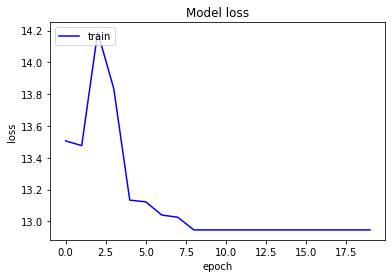

In [64]:
plt.plot(NN_3b.history['loss'], 'blue')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

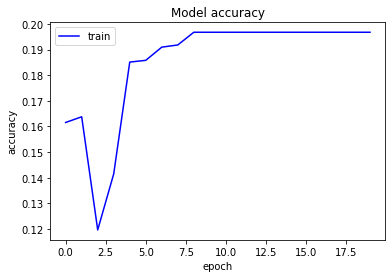

In [65]:
plt.plot(NN_3b.history['accuracy'], 'blue')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

**Model 4_6:**

1. 3 layers
2. 128+64+10 nodes in total
3. Activation- Sigmoid
4. Loss- Categorical Cross Entropy Loss
5. Only testing and training
6. Time taken for 15 epochs- 77s

In [66]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_6 = keras.Sequential([
    keras.layers.Dense(units=128, activation=tf.nn.sigmoid, input_shape=(784, )), #input layer
    keras.layers.Dense(units=64, activation=tf.nn.sigmoid), #1 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_4_6.summary() 

# Step 2 - Compile the model
model_4_6.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [67]:
NN_3 = model_4_6.fit(X_train, y_train, epochs=15)

test_loss, test_acc = model_4_6.evaluate(X_test, y_test)
print("Model - 3 layers - test loss:", test_loss)
print("Model - 3 layers - test accuracy:", test_acc * 100)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7737 - accuracy: 0.7231
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5799 - accuracy: 0.7861
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5492 - accuracy: 0.7983
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5273 - accuracy: 0.8079
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5169 - accuracy: 0.8137
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5045 - accuracy: 0.8169
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4929 - accuracy: 0.8218
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4879 - accuracy: 0.8258
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4895 - accuracy: 0.8259
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.479

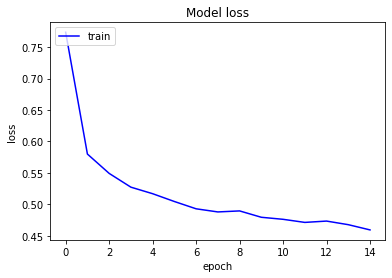

In [68]:
plt.plot(NN_3.history['loss'], 'blue')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

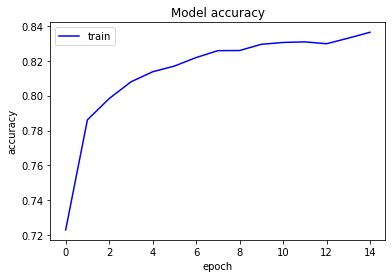

In [69]:
plt.plot(NN_3.history['accuracy'], 'blue')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

**Model 4_7:**

1. 3 layers
2. 128+64+10 nodes in total
3. Activation- TanH
4. Loss- Categorical Cross Entropy Loss
5. Only testing and training
6. Time taken for 15 epochs- 45s

In [70]:
keras.backend.clear_session()

seed = 7
np.random.seed(seed)

model_4_7 = keras.Sequential([
    keras.layers.Dense(units=128, activation=tf.nn.tanh, input_shape=(784, )), #input layer
    keras.layers.Dense(units=64, activation=tf.nn.tanh), #1 hidden layer
    keras.layers.Dense(units=10, activation=tf.nn.softmax) #output layer
])
model_4_7.summary() 

# Step 2 - Compile the model
model_4_7.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [71]:
NN_3 = model_4_7.fit(X_train, y_train, epochs=15)

test_loss, test_acc = model_4_7.evaluate(X_test, y_test)
print("Model - 3 layers - test loss:", test_loss)
print("Model - 3 layers - test accuracy:", test_acc * 100)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7665 - accuracy: 0.7084
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6395 - accuracy: 0.7597
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6003 - accuracy: 0.7736
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5724 - accuracy: 0.7857
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5575 - accuracy: 0.7948
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5464 - accuracy: 0.7997
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5443 - accuracy: 0.8005
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5381 - accuracy: 0.8024
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5243 - accuracy: 0.8067
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.515

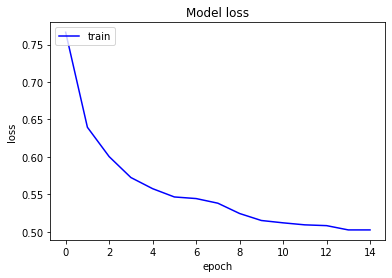

In [72]:
plt.plot(NN_3.history['loss'], 'blue')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

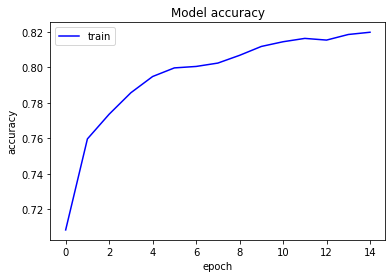

In [73]:
plt.plot(NN_3.history['accuracy'], 'blue')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')